In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us look at our house pricing dataset again.

In [3]:
df = pd.read_csv('../data/portland_housing_prices.csv')
df.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- $x \in \bf{R}^2$
- $x_1^{(i)}$ - living area of of the $i^{th}$ training sample
- $x_2^{(i)}$ - number of bedrooms in the $i^{th}$ training sample

Now we need to decide the structure of hypothesis $h$, let us assume that we approximate $y$ as a linear function of $x$, i.e. - $$h_{\theta}(x) = {\theta}_0+  {\theta}_1x_1 + {\theta}_2x_2$$

Where $\theta$ are the parameters parameterizing the space of linear functions mapping from $\bf{X}$ to $\bf{Y}$. <br>
Let us assume that there's an intercept term $x_0 = 1$, then $h_{\theta}(x)$ can be represented as - 
$$h_{\theta}(x)  = \Sigma_{i = 1}^{d}{\theta}_ix_i = \theta^Tx$$

Now, our goal is to learn the parameters $\theta$. We can do so by making $h_{\theta}(x)$ as close to $y$ as possible. **Cost function** would give us that quantitative measure.

### Cost Function - 
For each value of $\theta$ close is the $h_{\theta}(x^{(i)})$ to $y^{i}$. 

For the given regression problem, we cn define the cost function (function of $\theta$) as follows -
$$J(\theta) = \frac{1}{2}\Sigma_{i = 1}^{n}(h_{\theta}(x^{i}) - y^{i})^2$$

Minimizing this squared cost function will give rise to the **ordinary least square** solution.

## LMS Algorithm

We need to find the value of $\theta$ that minimize the $J(\theta)$. We'll use the **gradient descent** algorithm. We start with some initial guess of $\theta$ and iteratively converge to the optimal value of $\theta$. 
$$\theta_{j} := \theta_{j} - \alpha\frac{\partial J(\theta)}{\partial {\theta}_j}$$
- $\alpha$ - learning rate 

Update is simultaneously applied to all the values of $j = [0, .., d]$

To find the optimal value of $\theta$ we first need to find the derivative of $J(\theta)$ 
$$\begin{align*}
\frac{\partial J(\theta)}{\partial {\theta}_i} &= \frac{\partial }{\partial {\theta}_j}\frac{1}{2}\Sigma_{i = 1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2 \\
&= \Sigma_{i = 1}^{n}\frac{\partial }{\partial {\theta}_j}(\theta^Tx^{(i)} - y^{(i)})^2 \\
&= \Sigma_{i = 1}^{n} (\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}
\end{align*}
$$

$$
\therefore {\theta}_j := {\theta}_j + \alpha \Sigma_{i = 1}^{n} (y^{(i)} - \theta^Tx^{(i)})x_j^{(i)}
$$

This rule is called the **LMS** update rule or the **Widrow-hoff** learning rule. 

So for the entire dataset and grouping the $\theta$ into a single vector - 
We repeat until convergence - 
$$
\therefore {\theta} := {\theta} + \alpha \Sigma_{i = 1}^{n} (y^{(i)} - \theta^Tx^{(i)})x^{(i)}
$$

This optimization problem has only one global and no other local minima, as $J$ is a convex quadratic function.


## Batch Gradient Descent

In [58]:
from tqdm import tqdm
# batch gradient descent algorithm 
epoch = 100
alpha = 0.01
n = len(df)

# initial guess of theta
theta = np.array([[4.8], [3.]])

# feature matrix
X = df['area'].values.reshape(-1,1)
X = np.hstack((np.ones((n,1)), X))
# normalize feature matrix
X_norm = (X - X.mean())/X.std()

y = df['price'].values.reshape(-1,1)/1000

print(f"X shape: {X.shape} \ny shape: {y.shape} \ntheta shape: {theta.shape}")

# dimension of X
# d = X.shape[1]
J = []
print(np.dot(X_norm,theta).shape)
for k in range(epoch):
    h = np.dot(X_norm,theta)
    err = y - h
    J.append(np.sum(err**2)/2)
    theta = theta + alpha*np.dot(X_norm.T, err)

X shape: (47, 2) 
y shape: (47, 1) 
theta shape: (2, 1)
(47, 1)


In [59]:
print(X[1,])

[1.0e+00 1.6e+03]


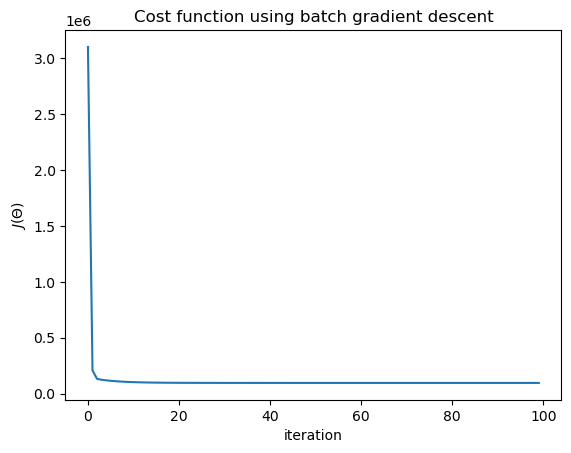

In [60]:
# plot the cost function
plt.plot(J)
plt.xlabel('iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using batch gradient descent')
plt.show()

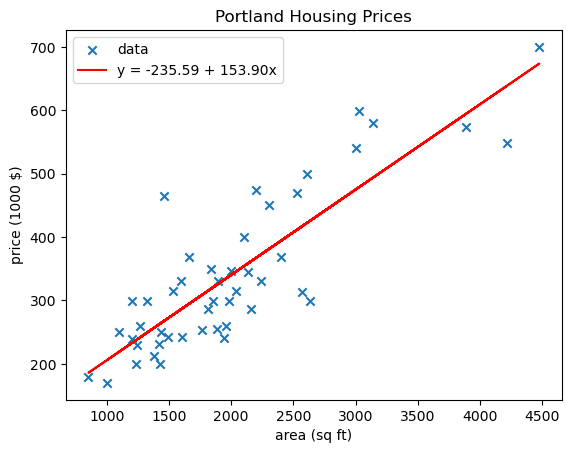

In [61]:
y_hat = np.dot(X_norm,theta)
plt.scatter(X[:, 1],y, label = 'data', marker = 'x')
plt.plot(X[:, 1],y_hat,'r', label = 'y = %.2f + %.2fx'%(theta[0],theta[1]))
plt.xlabel('area (sq ft)')
plt.ylabel('price (1000 $)')
plt.title('Portland Housing Prices')
plt.legend()

## Stochastic Gradient Descent

The batch gradient descent updates its gradient after seeing all the training example, alternative faster algorithm is the stochastic gradient descent, which sees one or a subset of training example before updating it gradient 

$$\begin{align*}
&Repeat\ until\ convergence \ - \\
&{\theta} := {\theta} + \alpha(y^{(i)} - \theta^Tx^{(i)})x^{(i)}
\end{align*}
$$

In [67]:
from tqdm import tqdm
# stochastic gradient descent algorithm 
epoch = 5
alpha = 0.01
n = len(df)

# initial guess of theta
theta = np.array([[4.8], [3.]])

# feature matrix
X = df['area'].values.reshape(-1,1)
X = np.hstack((np.ones((n,1)), X))
# normalize feature matrix
X_norm = (X - X.mean())/X.std()

y = df['price'].values.reshape(-1,1)/1000

print(f"X shape: {X.shape} \ny shape: {y.shape} \ntheta shape: {theta.shape}")

# dimension of X
# d = X.shape[1]
J = []
print(np.dot(X_norm,theta).shape)
for k in range(epoch):
    for i in range(n):
        X_norm_i = X_norm[i,:].reshape(1,-1)
        h = np.dot(X_norm_i,theta)
        err = y[i] - h
        J.append(np.sum(err**2)/2)
        theta = theta + alpha*np.dot(X_norm_i.T, err)

X shape: (47, 2) 
y shape: (47, 1) 
theta shape: (2, 1)
(47, 1)


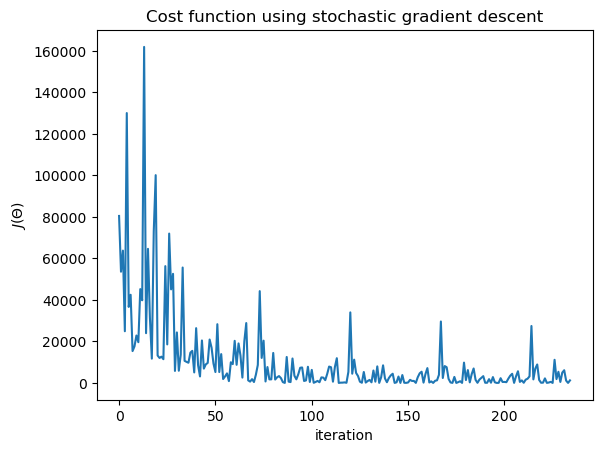

In [68]:
# plot the cost function
plt.plot(J)
plt.xlabel('iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using stochastic gradient descent')
plt.show()

We can see that the in the case of stochastic gradient descent, the cost function fluctuates a lot per iteration w.r.t the batch gradient descent.

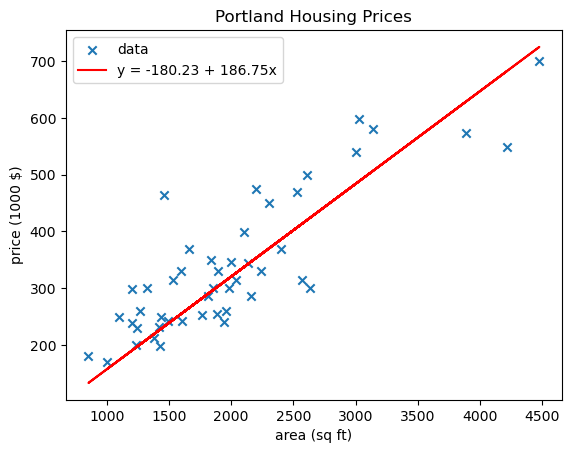

In [63]:
y_hat = np.dot(X_norm,theta)
plt.scatter(X[:, 1],y, label = 'data', marker = 'x')
plt.plot(X[:, 1],y_hat,'r', label = 'y = %.2f + %.2fx'%(theta[0],theta[1]))
plt.xlabel('area (sq ft)')
plt.ylabel('price (1000 $)')
plt.title('Portland Housing Prices')
plt.legend()

This algorithm may never "converge" to a minimum and just keep oscillating near the minimum of $J$, which in practice is a reasonably good approximation to the minima of $J$. Its a trade-off between the efficiency nd accuracy.

## Normal Equations

While gradient descent approximates the value of $\theta$ which minimizes $J(\theta)$, we can also explicitly find the minima. by taking the derivative of $J$ w.r.t $\theta$. Solving these optimization problem gives rise to Normal Equation.


- Design matrix $X$ - 
$$
X = \left[\begin{array}{cccc}
- - (x^1)^T - - \\
- - (x^2)^T - - \\
. . . . \\
. . . . \\
- - (x^n)^T - -\\
\end{array}
\right]_{n\times (d+1)}
$$
- $y$ is an n-dimensional vector
$$
y = \left[\begin{array}{c}
y^1\\
y^2\\
.\\
.\\
y^n\\
\end{array}
\right]_{n\times (d+1)}
$$
The cost function $J(\theta)$ is defined as - 
$$
J(\theta) = \frac{1}{2}(X\theta - y)^T(X\theta - y)
$$
To find the optimal value of the $\theta$ we take the derivative of the $J(\theta)$ w.r.t $\theta$ - 
$$\begin{align*}
\Delta_{\theta}J(\theta) &= \Delta_{\theta}\frac{1}{2}(X\theta - y)^T(X\theta - y) \\
&= \frac{1}{2} \Delta_{\theta} ((X\theta)^T(X\theta) - y^T(X\theta) -(X\theta)^Ty - y^Ty) \\
&= \frac{1}{2} \Delta_{\theta} (\theta^TX^TX\theta - 2y^T(X\theta)) \\ 
&= \frac{1}{2} \Delta_{\theta} (\theta^TX^TX\theta - 2(Xy)^T\theta) \\ 
&= \frac{1}{2} (2X^TX\theta - 2X^Ty) \\
&= X^TX\theta - X^Ty
\end{align*}
$$
using the fact that $\Delta_xx^TA_{sym}x$ = 2Ax and $\Delta_xb^Ty = b$
Equating the derivative to $0$, we get the normal equations which can be solved for $\theta$ to get their optimal value.
$$
\theta = (X^TX)^{-1}X^Ty
$$
Here we are implicitly assuming that the matrix $(X^TX)$ is invertible.

In [5]:
n = len(df)
X = df['area'].values.reshape(-1,1)
X = np.hstack((np.ones((n,1)), X))
# normalize feature matrix
X_norm = (X - X.mean())/X.std()
y = df['price'].values.reshape(-1,1)/1000

print(f"X shape: {X.shape} \ny shape: {y.shape}")

theta = np.dot(np.dot(np.linalg.inv(np.dot(X_norm.T,X_norm)),X_norm.T),y)
print(theta)

X shape: (47, 2) 
y shape: (47, 1)
[[-235.59750074]
 [ 153.89705588]]


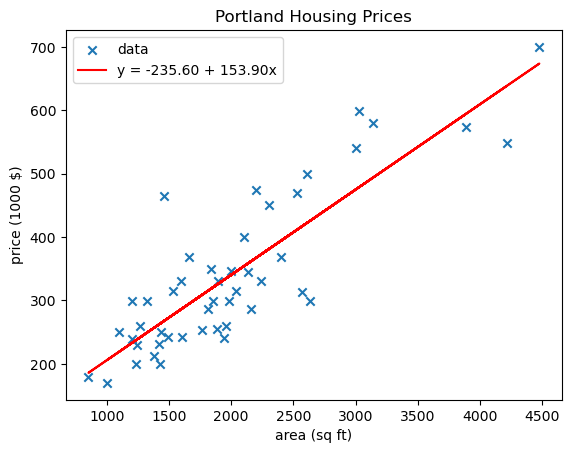

In [6]:
y_hat = np.dot(X_norm,theta)
plt.scatter(X[:, 1],y, label = 'data', marker = 'x')
plt.plot(X[:, 1],y_hat,'r', label = 'y = %.2f + %.2fx'%(theta[0],theta[1]))
plt.xlabel('area (sq ft)')
plt.ylabel('price (1000 $)')
plt.title('Portland Housing Prices')
plt.legend()

This value of $\theta$ is closer to batch optimization solution than the stochastic optimization.

## Probabilistic Interpretation 
Assumptions for least-squared regression.
$$
y^{(i)} = \theta^Tx^(i) + \epsilon_{i} \ \ (1)
$$
- $\epsilon$ - error term, captured unmodeled effects

Assumptions -
- $y$ is linearly related to $x$ (eqn $i$)
- $\epsilon^{i}$'s follow IID Normal Distribution $\epsilon^{(i)} \sim N(0, \sigma^2)$

Let's see how these assumptions give rise to squared error cost function.
$$
p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(\epsilon^{(i)})^2}{2\sigma^2}) 
$$

$\therefore$ from the equation (1), probability distribution of $y^{(i)}$ conditioned on $x^{(i)}$ and parameterized by $\theta$ is given by - 

$$\begin{align*}
p(y^{(i)}|x^{(i)};\theta) &= \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(y^{(i)} - \theta^Tx^{{i}})^2}{2\sigma^2}) \\
y^{(i)}|x^{(i)};\theta &\sim N(\theta^Tx^{(i)}, \sigma^2)
\end{align*}
$$

When this quantity is viewed as a function of $\theta$, we call it the **likelihood function** - 
$$
L(\theta) = L(\theta;X,y) = p(y|X;\theta)
$$ 
By the independence assumption of $\epsilon^{(i)}$ - 
$$\begin{align*}
L(\theta) &= \Pi_{i = 1}^np(y^{(i)}|x^{(i)};\theta) \\
&= \Pi_{i = 1}^n \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(y^{(i)} - \theta^Tx^{{i}})^2}{2\sigma^2}) 
\end{align*}
$$

The best guess of parameter $\theta$ for a given $h(\theta)$ is the one that maximizes the value of $L(\theta)$ i.e. the maximum likelihood estimate of $\theta$ which is equivalent to maximizing the log-likelihood $l(\theta)$ - 

$$\begin{align*}
l(\theta) &= \frac{n}{\sqrt{2\pi}\sigma} - \frac{1}{2\sigma^2}\Sigma_{i = 1}^{n}(y^{(i)} - \theta^Tx^{{i}})^2
\end{align*}
$$

which is equivalent to minimizing the term - 
$$
\frac{1}{2}\Sigma_{i = 1}^{n}(y^{(i)} - \theta^Tx^{{i}})^2
$$

Which is our original $J(\theta)$. <br>
$\therefore$ Under the some probabilistic assumptions, least square solution is equivalent to finding the maximum likelihood estimate of $\theta$.

